In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
import plotly.express as px

# #IMPORT 5 ALGORITHMS FROM SKLEARN
# %matplotlib inline
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.linear_model import LassoCV

# #INSTANTIATE 5 ALGORITHMS/ESTIMATORS
# rf = RandomForestRegressor()
# dt = DecisionTreeRegressor()
# etr = ExtraTreesRegressor()
# ada = AdaBoostRegressor()
# lso = LassoCV()

In [2]:
df = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df2 = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df

,student_id,age,sex,course,yr_level,socioeconomic_stat,fam_support,working_stud,scholar,personality_type,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,F,CD,2,low,yes,no,yes,ISTJ,...,never,always,always,sometimes,always,always,sometimes,sometimes,1.5588,Superior
1,2021-02910,19.0,F,CD,2,lower middle,yes,no,no,ESFJ,...,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,sometimes,1.3824,Superior
2,2021-02862,19.0,F,CD,2,low,yes,no,no,ENTP,...,always,never,always,sometimes,sometimes,always,sometimes,sometimes,1.5882,Superior
3,2021-02890,19.0,F,CD,2,lower middle,yes,yes,no,ESFJ,...,always,sometimes,never,sometimes,sometimes,sometimes,always,sometimes,1.5000,Superior
4,2020-04136,20.0,F,CD,2,low,yes,no,no,ISFJ,...,sometimes,never,sometimes,sometimes,never,sometimes,sometimes,always,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,F,SW,2,lower middle,yes,no,no,ISFP,...,always,sometimes,never,never,Sometimes,sometimes,sometimes,never,1.9559,Very-Satisfactory
353,2021-01868,20.0,F,SW,2,low,yes,yes,no,ISFP,...,always,never,sometimes,sometimes,Sometimes,always,sometimes,never,1.5294,Superior
354,2021-01891,19.0,F,SW,2,low,yes,no,no,ENFJ,...,always,never,always,never,always,sometimes,sometimes,sometimes,1.7647,Very-Satisfactory
355,2021-01897,19.0,F,SW,2,low,yes,no,no,ISFP,...,always,always,sometimes,never,always,always,sometimes,never,1.4853,Superior


In [4]:
df.gpa_range.unique()

array(['Superior', 'Satisfactory', 'Very-Satisfactory',
       'Barely-Satisfactory', 'Fairly-Satisfactory', 'Excellent'],
      dtype=object)

# DATA EXPLORATION

In [5]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)

Dimension of the data raw dataframe Rows by Columns,  (357, 51)


In [6]:
#check Dataframe with null values
df2.isna().sum()

student_id             0
age                   11
sex                    6
course                 0
yr_level               0
socioeconomic_stat     0
fam_support            0
working_stud           0
scholar                0
personality_type       0
TM1                    0
TM2                    0
TM3                    0
TM4                    0
TM5                    0
TM6                    0
TM7                    0
CAP1                   0
CAP2                   0
CAP3                   1
CAP4                   0
GSS1                   0
GSS2                   0
GSS3                   0
GSS4                   0
GSS5                   0
GSS6                   0
GSS7                   0
EP1                    0
EP2                    0
EP3                    0
EP4                    0
EP5                    0
EP6                    0
NT1                    0
NT2                    0
NT3                    0
desktop                0
laptop                 0
mobile_phone           0


In [7]:
df.describe()

,age,yr_level,GPA
count,346.000000,357.000000,357.000000
mean,20.462428,2.851541,1.918353
std,1.520880,0.740353,0.446958
min,10.000000,2.000000,1.197900
25%,20.000000,2.000000,1.586500
50%,20.000000,3.000000,1.855800
75%,21.000000,3.000000,2.148700
max,29.000000,4.000000,4.368400


# DATA CLEANING

In [8]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale


Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    198
M    159
Name: sex, dtype: int64

In [9]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([10., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       nan])

In [10]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [11]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [12]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

In [13]:
df.socioeconomic_stat.unique()

array(['low', 'lower middle', 'middle', 'upper middle', 'low ',
       'Upper but not rich', 'rich', 'lower'], dtype=object)

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

In [15]:
#PRINT UNIQUENESS 
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")


 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 10. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ENFP' 'ISTP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes'] 

 Unique of TM7 

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

In [16]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [17]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

# TRANSFORMING DATA

In [19]:
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,5,9]]
maplist = [{'col' : 'socioeconomic_stat', 'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'CD':1, 'IT':2, 'CS':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {'ISTJ':0, 'ESFJ':1, 'ENTP':2, 'ISFJ':3, 'ENFJ':4, 'INFJ':5, 'ISFP':6, 'INTJ':7,
       'ENTJ':8, 'ESTP':9, 'INFP':10, 'ESFP':11, 'ESTJ':12, 'ENFP':13, 'ISTP':14, 'INTP':15}}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

In [20]:
Select_demographicFeatures = df.iloc[:, [6, 7, 8]]
maplist = [{'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

In [21]:
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

# DATAFRAME CONCATINATION

In [22]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

,student_id,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,1,0,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,2021-02910,19.0,0,1,2,2,1,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,2021-02862,19.0,0,1,2,1,2,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,2021-02890,19.0,0,1,2,2,1,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,2020-04136,20.0,0,1,2,1,3,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,2,6,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,Very-Satisfactory
353,2021-01868,20.0,0,4,2,1,6,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,Superior
354,2021-01891,19.0,0,4,2,1,4,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,Very-Satisfactory
355,2021-01897,19.0,0,4,2,1,6,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,Superior


In [23]:
newDF.sex.unique()

array([0, 1])

In [24]:
newDF.age.unique()

array([19.        , 20.        , 21.        , 25.        , 18.        ,
       20.46242775, 22.        , 27.        , 24.        , 23.        ,
       29.        , 28.        , 10.        , 26.        ])

In [25]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    int32  
 3   course              357 non-null    int32  
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    int32  
 6   personality_type    357 non-null    int32  
 7   fam_support         357 non-null    int32  
 8   working_stud        357 non-null    int32  
 9   scholar             357 non-null    int32  
 10  TM1                 357 non-null    int32  
 11  TM2                 357 non-null    int32  
 12  TM3                 357 non-null    int32  
 13  TM4                 357 non-null    int32  
 14  TM5                 357 non-null    int32  
 15  TM6                 357 non-null    int32  
 16  TM7     

In [26]:
newDF.personality_type.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [27]:
newDF

,student_id,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,2021-01592,19.0,0,1,2,1,0,1,0,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,2021-02910,19.0,0,1,2,2,1,1,0,0,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,2021-02862,19.0,0,1,2,1,2,1,0,0,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,2021-02890,19.0,0,1,2,2,1,1,1,0,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,2020-04136,20.0,0,1,2,1,3,1,0,0,...,2,3,2,2,3,2,2,1,1.4347,Superior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-00476,21.0,0,4,2,2,6,1,0,0,...,1,2,3,3,2,2,2,3,1.9559,Very-Satisfactory
353,2021-01868,20.0,0,4,2,1,6,1,1,0,...,1,3,2,2,2,1,2,3,1.5294,Superior
354,2021-01891,19.0,0,4,2,1,4,1,0,0,...,1,3,1,3,1,2,2,2,1.7647,Very-Satisfactory
355,2021-01897,19.0,0,4,2,1,6,1,0,0,...,1,1,2,3,1,1,2,3,1.4853,Superior


In [28]:
newDF.yr_level.unique()

array([2, 3, 4], dtype=int64)

In [29]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    int32  
 3   course              357 non-null    int32  
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    int32  
 6   personality_type    357 non-null    int32  
 7   fam_support         357 non-null    int32  
 8   working_stud        357 non-null    int32  
 9   scholar             357 non-null    int32  
 10  TM1                 357 non-null    int32  
 11  TM2                 357 non-null    int32  
 12  TM3                 357 non-null    int32  
 13  TM4                 357 non-null    int32  
 14  TM5                 357 non-null    int32  
 15  TM6                 357 non-null    int32  
 16  TM7     

# DESCRIPTIVE VISUALIZATION

In [30]:
#create datframe for demographics
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9]]

In [31]:
#create dummy to all tri-features
timeManagement_TM = pd.get_dummies(df.iloc[:,10:17])
classAttendancePartcipation_CAP = pd.get_dummies(df.iloc[:,17:21])

In [32]:
#tri-dataframes
DEMOandTM_DF = pd.concat([newDEMOinfo, timeManagement_TM], axis=1)
DEMOandCAP_DF = pd.concat([newDEMOinfo, classAttendancePartcipation_CAP], axis=1)

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## PLOT TIME MANAGEMENT FOR PERSONALITY TYPE

In [37]:
#create pivo_tabel for each tri-features for plotting
count_tm1_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM1_always", "TM1_sometimes","TM1_never"] , index="personality_type", aggfunc='sum')

count_tm2_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM2_always", "TM2_sometimes","TM2_never"] , index="personality_type", aggfunc='sum')

count_tm3_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM3_always", "TM3_sometimes","TM3_never"] , index="personality_type", aggfunc='sum')

count_tm4_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM4_always", "TM4_sometimes","TM4_never"] , index="personality_type", aggfunc='sum')

count_tm5_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM5_always", "TM5_sometimes","TM5_never"] , index="personality_type", aggfunc='sum')

count_tm6_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM6_always", "TM6_sometimes","TM6_never"] , index="personality_type", aggfunc='sum')

count_tm7_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM7_always", "TM7_sometimes","TM7_never"] , index="personality_type", aggfunc='sum')

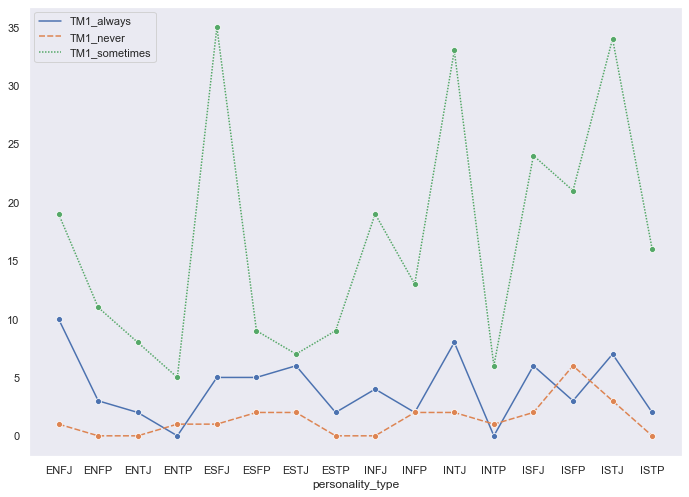

In [38]:
sns.lineplot(data=count_tm1_freq, marker="o")
plt.grid()

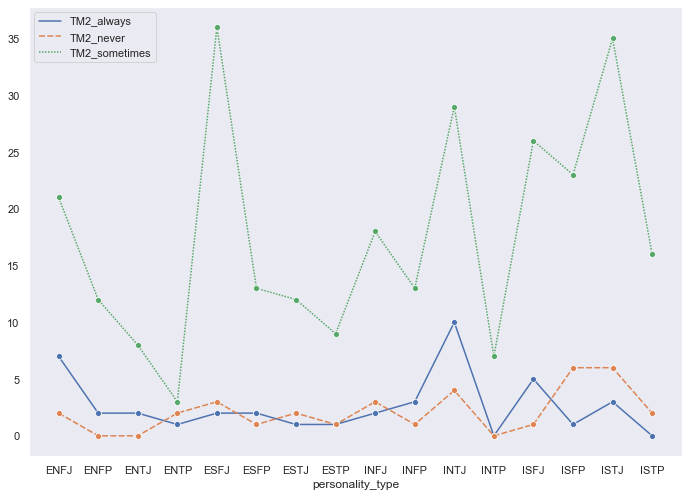

In [39]:
sns.lineplot(data=count_tm2_freq, marker="o")
plt.grid()

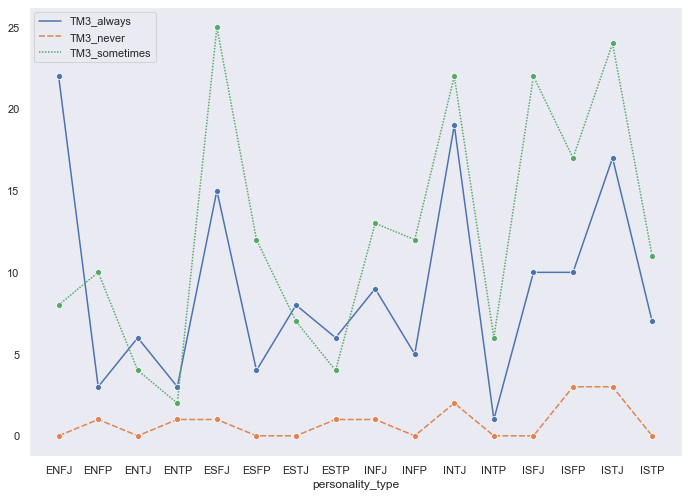

In [40]:
sns.lineplot(data=count_tm3_freq, marker="o")
plt.grid()

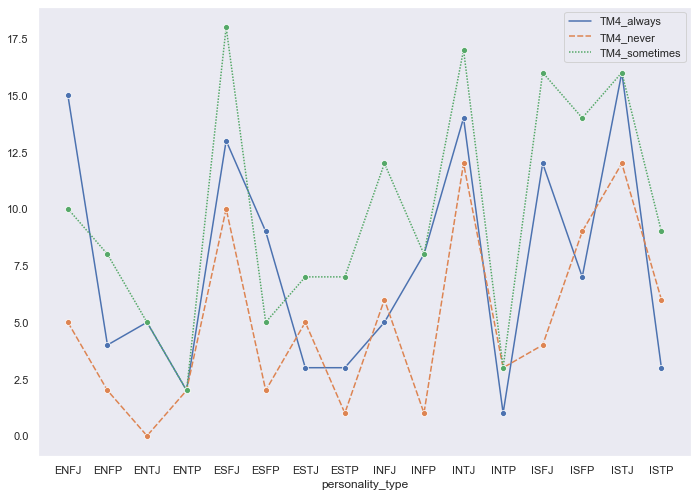

In [41]:
sns.lineplot(data=count_tm4_freq, marker="o")
plt.grid()

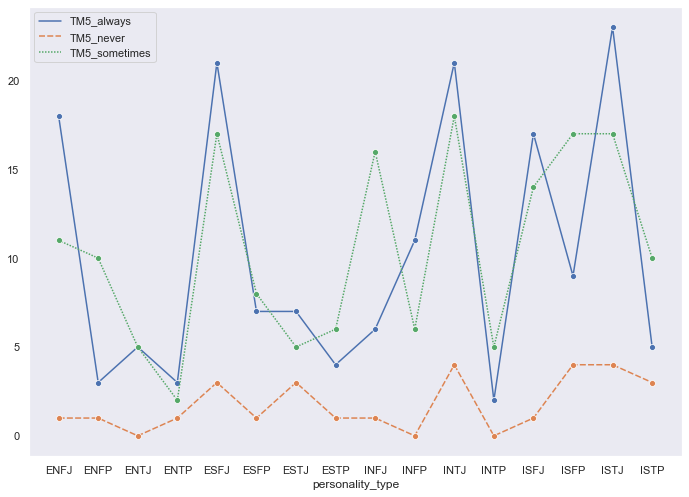

In [42]:
sns.lineplot(data=count_tm5_freq, marker="o")
plt.grid()

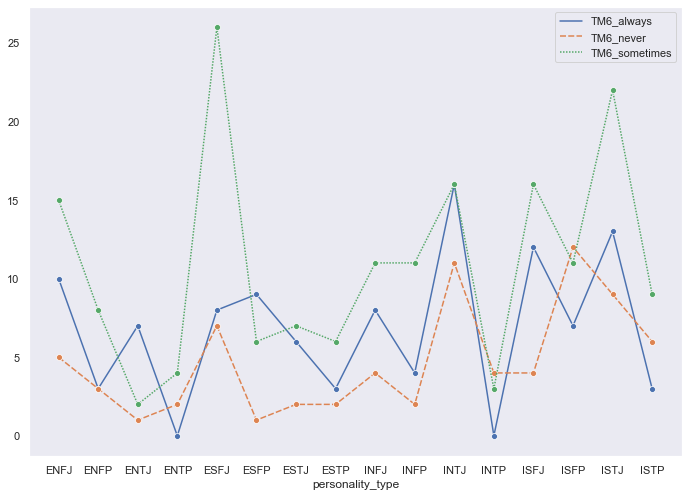

In [43]:
sns.lineplot(data=count_tm6_freq, marker="o")
plt.grid()

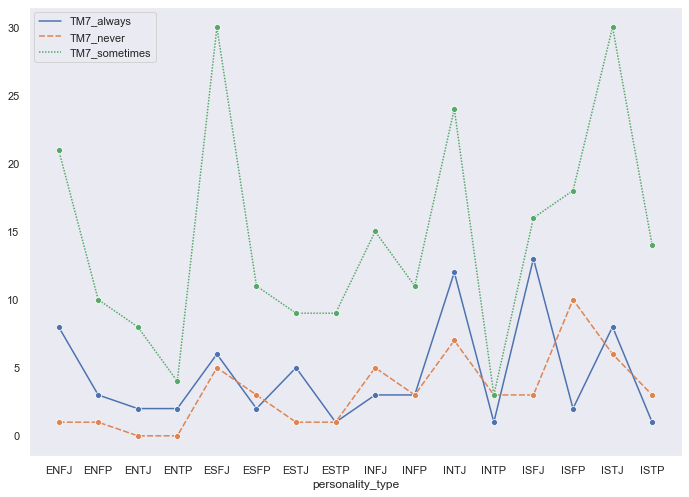

In [44]:
sns.lineplot(data=count_tm7_freq, marker="o")
plt.grid()

<AxesSubplot:title={'center':'Age Distribution'}>

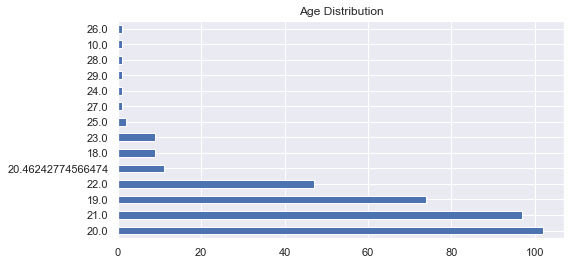

In [45]:
#count 'sex' column ing pie chart
newDF["age"].value_counts()[:].plot(kind='barh', title='Age Distribution', figsize=(8,4))

<AxesSubplot:xlabel='sex,fam_support'>

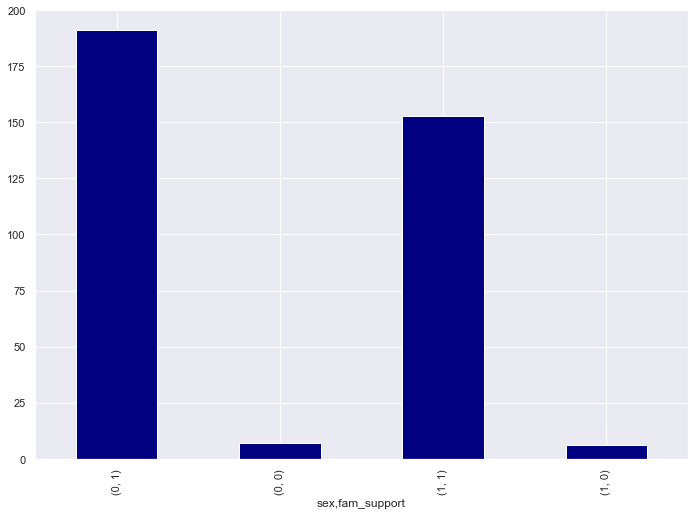

In [46]:
#Count of each sex with family_support
PersonalityPopu = newDF.groupby('sex')[["fam_support"]].value_counts()
PersonalityPopu.plot(kind='bar', colormap='jet')

In [47]:
DiFeatures_DF.corr()

,fam_support,working_stud,scholar
fam_support,1.000000,-0.305185,-0.023546
working_stud,-0.305185,1.000000,0.077603
scholar,-0.023546,0.077603,1.000000


In [48]:
StudInfo_DF.corr()

,age,sex,course,yr_level,socioeconomic_stat,personality_type
age,1.000000,-0.008345,0.073705,0.458607,0.044174,0.032515
sex,-0.008345,1.000000,0.095132,-0.025881,0.096737,0.073796
course,0.073705,0.095132,1.000000,0.042690,0.033566,0.111371
yr_level,0.458607,-0.025881,0.042690,1.000000,0.065533,-0.005072
socioeconomic_stat,0.044174,0.096737,0.033566,0.065533,1.000000,0.056496
personality_type,0.032515,0.073796,0.111371,-0.005072,0.056496,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'course'}>,
        <AxesSubplot:title={'center':'yr_level'}>,
        <AxesSubplot:title={'center':'socioeconomic_stat'}>,
        <AxesSubplot:title={'center':'personality_type'}>,
        <AxesSubplot:title={'center':'fam_support'}>],
       [<AxesSubplot:title={'center':'working_stud'}>,
        <AxesSubplot:title={'center':'scholar'}>,
        <AxesSubplot:title={'center':'TM1'}>,
        <AxesSubplot:title={'center':'TM2'}>,
        <AxesSubplot:title={'center':'TM3'}>,
        <AxesSubplot:title={'center':'TM4'}>,
        <AxesSubplot:title={'center':'TM5'}>],
       [<AxesSubplot:title={'center':'TM6'}>,
        <AxesSubplot:title={'center':'TM7'}>,
        <AxesSubplot:title={'center':'CAP1'}>,
        <AxesSubplot:title={'center':'CAP2'}>,
        <AxesSubplot:title={'center':'CAP3'}>,
        <AxesSubplot:title={'center':'CAP4'}>,
        <AxesSubp

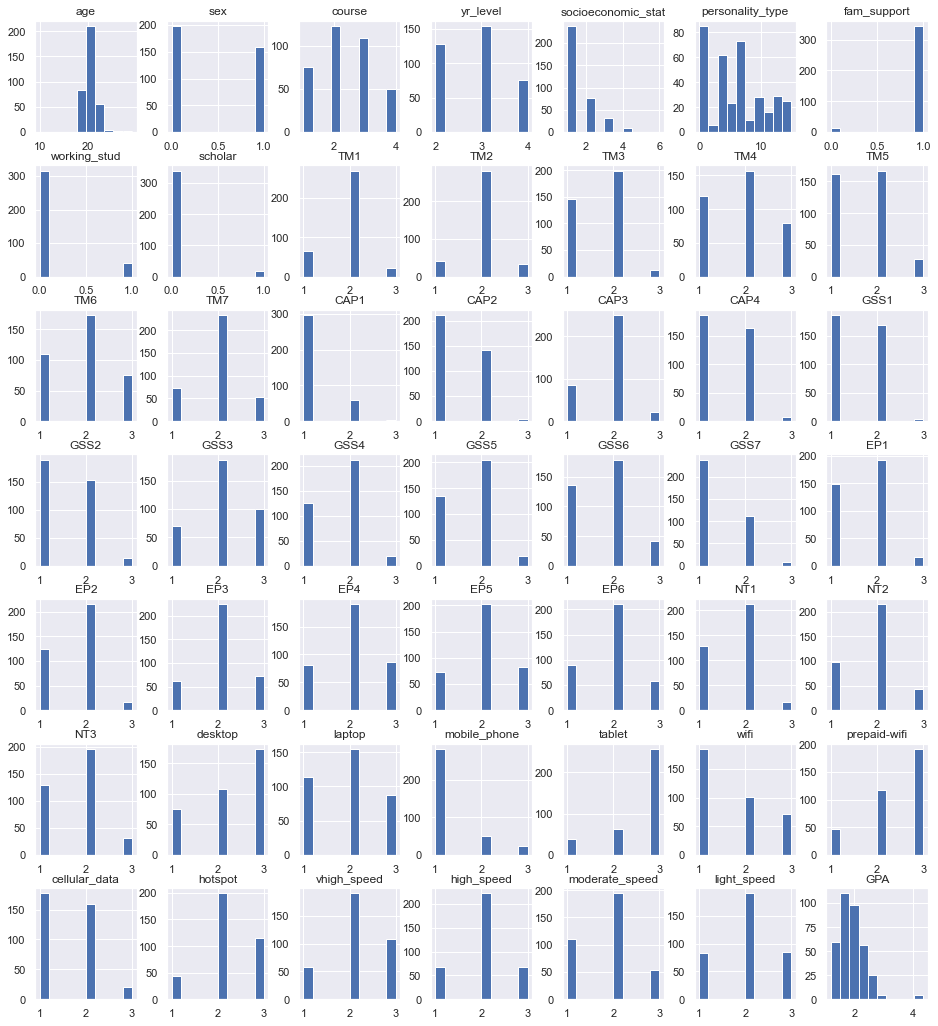

In [49]:
newDF.hist(grid=True,  figsize = (16,18))

### Dropping columns 

In [50]:
newDF.drop(columns = 'student_id', inplace=True)

In [51]:
newDF.head(10)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
0,19.0,0,1,2,1,0,1,0,1,1,...,3,1,1,2,1,1,2,2,1.5588,Superior
1,19.0,0,1,2,2,1,1,0,0,2,...,2,2,2,2,2,2,2,2,1.3824,Superior
2,19.0,0,1,2,1,2,1,0,0,2,...,1,3,1,2,2,1,2,2,1.5882,Superior
3,19.0,0,1,2,2,1,1,1,0,2,...,1,2,3,2,2,2,1,2,1.5000,Superior
4,20.0,0,1,2,1,3,1,0,0,1,...,2,3,2,2,3,2,2,1,1.4347,Superior
5,21.0,0,1,2,1,4,1,0,0,2,...,1,3,1,3,2,2,2,1,2.2500,Satisfactory
6,19.0,0,1,2,1,0,1,0,0,2,...,2,3,2,3,3,3,2,3,1.5000,Superior
7,21.0,0,1,2,1,5,0,1,0,2,...,1,2,2,2,2,2,2,2,1.5294,Superior
8,19.0,0,1,2,1,6,1,0,0,1,...,2,2,2,2,2,2,2,2,1.7206,Superior
9,19.0,0,1,2,1,3,1,0,0,2,...,3,3,1,3,3,3,2,1,1.5000,Superior


## EDA HERE!

## END OF EDA

# Checking Outliers

[Text(0.5, 1.0, 'Outliers of StudInfo_DF')]

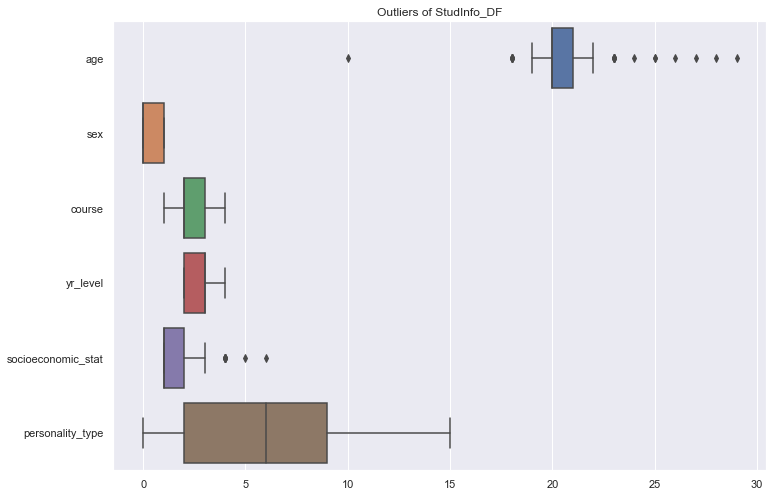

In [52]:
sns.boxplot(data=StudInfo_DF, orient = "h").set(title="Outliers of StudInfo_DF")

[Text(0.5, 1.0, 'Box Plot of Scores')]

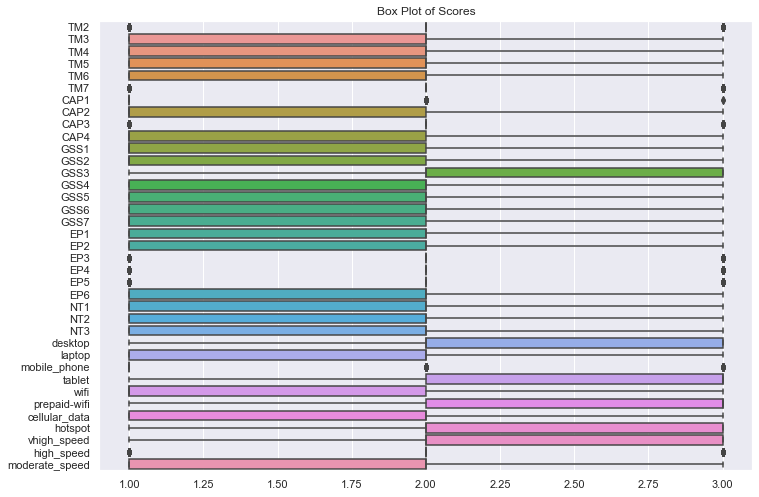

In [53]:
sns.boxplot(data=newDF.iloc[:, 10:47], orient = "h").set(title="Box Plot of Scores")

[Text(0.5, 1.0, 'Box Plot of Scores')]

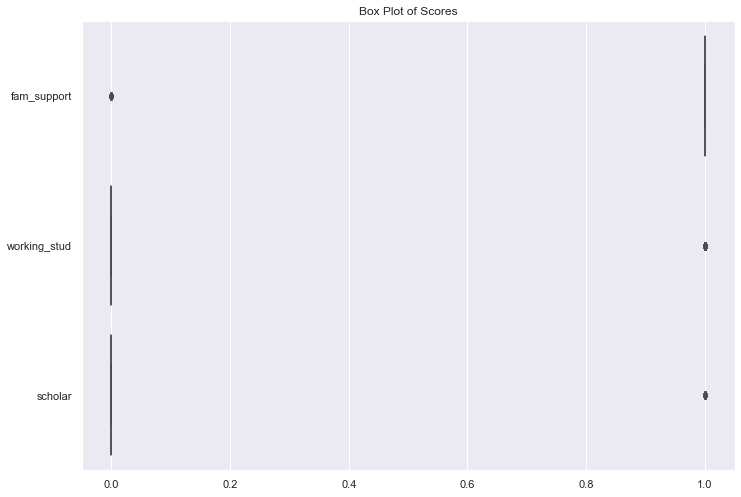

In [54]:
sns.boxplot(data=DiFeatures_DF, orient = "h").set(title="Box Plot of Scores")

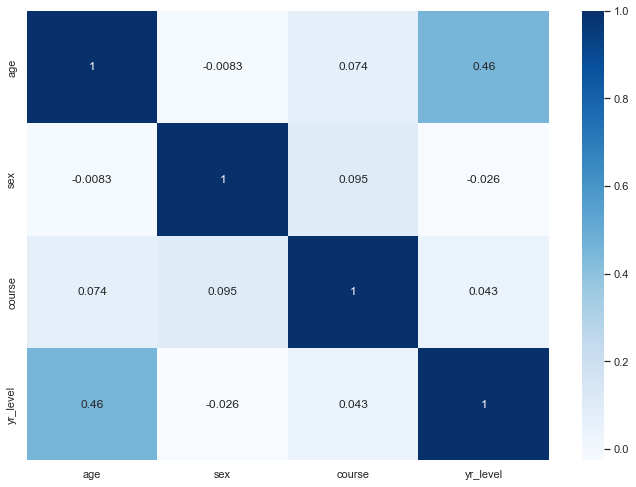

In [55]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level']].corr(), cmap='Blues', annot=True)
plt.show()

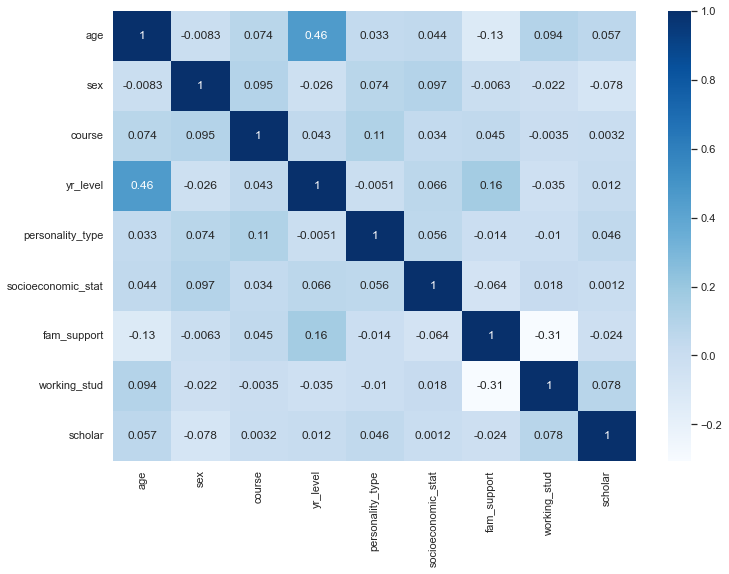

In [56]:
sns.heatmap(newDF[['age', 'sex', 'course', 'yr_level', 'personality_type',
       'socioeconomic_stat', 'fam_support', 'working_stud', 'scholar']].corr(), cmap='Blues', annot=True)
plt.show()

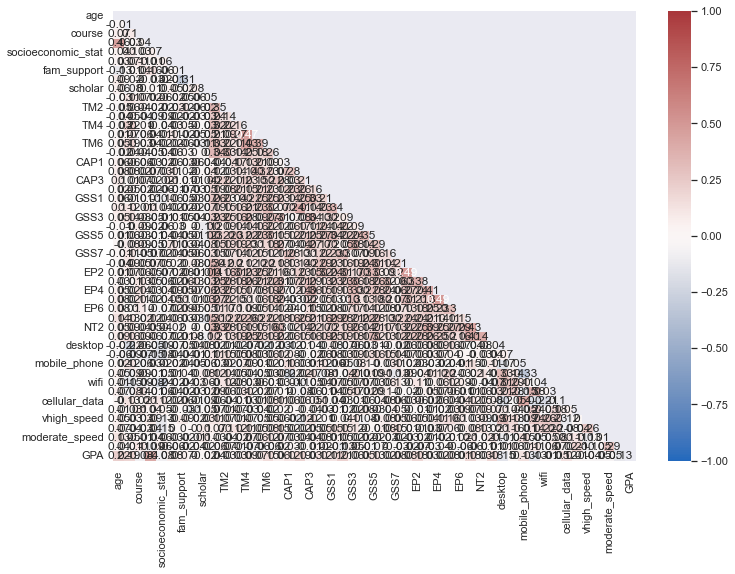

In [57]:
matrix = newDF.corr(method = 'pearson', min_periods = 1).round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [58]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 357 non-null    float64
 1   sex                 357 non-null    int32  
 2   course              357 non-null    int32  
 3   yr_level            357 non-null    int64  
 4   socioeconomic_stat  357 non-null    int32  
 5   personality_type    357 non-null    int32  
 6   fam_support         357 non-null    int32  
 7   working_stud        357 non-null    int32  
 8   scholar             357 non-null    int32  
 9   TM1                 357 non-null    int32  
 10  TM2                 357 non-null    int32  
 11  TM3                 357 non-null    int32  
 12  TM4                 357 non-null    int32  
 13  TM5                 357 non-null    int32  
 14  TM6                 357 non-null    int32  
 15  TM7                 357 non-null    int32  
 16  CAP1    

In [59]:
#newDF.drop("student_id", axis=1, inplace=True)

In [60]:
features=newDF.columns[0:-1].values
features

array(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar',
       'TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2',
       'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2',
       'NT3', 'desktop', 'laptop', 'mobile_phone', 'tablet', 'wifi',
       'prepaid-wifi', 'cellular_data', 'hotspot', 'vhigh_speed',
       'high_speed', 'moderate_speed', 'light_speed', 'GPA'], dtype=object)

In [61]:
target=newDF.columns[-1:].values
target

array(['gpa_range'], dtype=object)

## Split data to train and test dataset

In [62]:
from sklearn.model_selection import train_test_split
train, test =train_test_split(newDF, test_size=0.2, random_state=42)
train.sample(10)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
91,19.0,1,3,2,1,7,1,0,0,2,...,3,3,1,2,3,2,1,1,1.7788,Very-Satisfactory
308,20.0,0,4,3,1,0,1,0,0,1,...,1,1,2,2,2,2,2,2,1.8152,Very-Satisfactory
103,19.0,1,3,2,2,8,1,0,0,2,...,1,3,1,2,2,1,2,2,1.9519,Very-Satisfactory
154,21.0,0,3,4,1,6,1,0,1,2,...,1,3,1,3,2,2,2,2,1.9605,Very-Satisfactory
171,21.0,0,3,4,2,5,1,0,0,2,...,1,2,2,2,2,1,1,2,1.9342,Very-Satisfactory
8,19.0,0,1,2,1,6,1,0,0,1,...,2,2,2,2,2,2,2,2,1.7206,Superior
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,1,2,3,3,1,3,1.5870,Superior
81,18.0,1,3,2,1,0,1,0,0,2,...,1,2,2,3,2,2,2,2,1.3558,Superior
127,21.0,1,3,3,1,7,1,1,0,2,...,3,3,1,1,3,3,3,1,2.4659,Satisfactory
243,20.0,0,2,3,1,5,1,0,0,2,...,1,3,2,2,1,2,2,2,1.9524,Very-Satisfactory


In [63]:
newDF["gpa_range"].unique()

array(['Superior', 'Satisfactory', 'Very-Satisfactory',
       'Barely-Satisfactory', 'Fairly-Satisfactory', 'Excellent'],
      dtype=object)

In [64]:
train.head(5)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
282,21.0,0,2,4,1,0,1,0,0,2,...,2,3,1,3,2,2,1,2,2.4375,Satisfactory
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,1,2,3,3,1,3,1.5870,Superior
288,21.0,0,2,4,1,7,1,0,0,3,...,1,3,2,2,2,2,1,2,2.0313,Very-Satisfactory
75,21.0,0,1,4,1,7,1,0,0,2,...,1,2,2,2,2,1,2,2,1.8333,Very-Satisfactory
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2.9881,Fairly-Satisfactory


In [65]:
test.head(5)

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA,gpa_range
222,10.0,0,2,2,2,3,1,0,0,3,...,2,3,1,3,3,2,1,1,1.5313,Superior
42,22.0,0,1,3,1,3,1,0,0,2,...,3,2,1,3,2,1,2,3,1.9231,Very-Satisfactory
291,21.0,0,2,4,2,1,1,0,0,2,...,1,2,1,2,2,2,2,2,2.3906,Very-Satisfactory
300,21.0,1,2,4,1,4,1,0,0,2,...,2,2,1,2,2,2,1,1,2.4844,Very-Satisfactory
56,20.0,0,1,3,1,1,1,0,0,2,...,2,2,1,2,2,2,2,2,1.6058,Superior


In [66]:
test.shape

(72, 50)

In [67]:
train.shape

(285, 50)

In [68]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean
from numpy import std
import math
warnings.filterwarnings('ignore')

In [69]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [70]:
X_train

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,tablet,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA
282,21.0,0,2,4,1,0,1,0,0,2,...,3,2,3,1,3,2,2,1,2,2.4375
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,3,1,2,3,3,1,3,1.5870
288,21.0,0,2,4,1,7,1,0,0,3,...,3,1,3,2,2,2,2,1,2,2.0313
75,21.0,0,1,4,1,7,1,0,0,2,...,3,1,2,2,2,2,1,2,2,1.8333
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2,2.9881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21.0,0,1,4,1,6,1,0,0,2,...,3,1,2,1,3,2,1,2,2,1.8333
106,23.0,1,3,2,1,3,1,0,0,2,...,2,1,2,1,2,3,1,3,3,1.3846
270,22.0,0,2,3,1,0,1,0,0,2,...,3,1,3,2,2,2,2,2,2,2.0000
348,19.0,0,4,2,1,15,1,0,0,2,...,3,1,3,2,2,2,2,2,2,1.5147


In [71]:
Y_train

,gpa_range
282,Satisfactory
333,Superior
288,Very-Satisfactory
75,Very-Satisfactory
255,Fairly-Satisfactory
...,...
71,Very-Satisfactory
106,Superior
270,Very-Satisfactory
348,Superior


In [72]:
target

array(['gpa_range'], dtype=object)

In [73]:
# Import Classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
adc = AdaBoostClassifier()
knc = KNeighborsClassifier()
gnbc = GaussianNB()

# BUILD BOOSTING ENSEMBLE CLASSIFIER

In [74]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import bias_variance_decomp

# [NEW] Boosting Model

In [75]:
#create list of classifiers [NEW]
estimatorsNEW = [("RandomForestClassifier", rfc), 
              ("DecisionTreeClassifier", dtc), 
              ("ExtraTreesClassifier", etc), 
              ("AdaBoostClassifier", adc),
              ("KNeighborsClassifier", knc)]

In [79]:
# Apply GradientBoostingRegressor 
Clf_GradBoost_estNEW = GradientBoostingClassifier(n_estimators=50, max_features=1, max_leaf_nodes=30 ,random_state=42)

clf_boosting_ensembleNEW = StackingClassifier(estimators=estimatorsNEW, final_estimator=Clf_GradBoost_estNEW)
clf_boosting_ensembleNEW.fit(X_train,Y_train)

#PREDICTED Y VALUES FOR BOOSTING ENSEMBLE CLASSIFIERS
clf_boosting_YpredictNEW = clf_boosting_ensembleNEW.predict(X_test)

clf_score = accuracy_score(Y_test, clf_boosting_YpredictNEW)
print("ACCURACY SCORE: [ {:00%} ]".format(clf_score))

ACCURACY SCORE: [ 87.500000% ]


In [80]:
print(classification_report(Y_test, clf_boosting_YpredictNEW))

                     precision    recall  f1-score   support

Barely-Satisfactory       1.00      1.00      1.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.80      0.57      0.67        14
           Superior       1.00      1.00      1.00        29
  Very-Satisfactory       0.78      0.93      0.85        27

           accuracy                           0.88        72
          macro avg       0.72      0.70      0.70        72
       weighted avg       0.87      0.88      0.86        72



In [82]:
print(" precision_score {:%}".format(precision_score(Y_test, clf_boosting_YpredictNEW, average="macro" )))

 precision_score 71.625000%


In [84]:
multilabel_confusion_matrix(Y_test, clf_boosting_YpredictNEW)

array([[[71,  0],
        [ 0,  1]],

       [[71,  0],
        [ 1,  0]],

       [[56,  2],
        [ 6,  8]],

       [[43,  0],
        [ 0, 29]],

       [[38,  7],
        [ 2, 25]]], dtype=int64)

# [OLD] Boosting Model

In [85]:
#create list of classifiers [OLD]
#rf, dt, svr, knn, ada
estimatorsOLD = [("RandomForestClassifier", rfc), 
                 ("DecisionTreeClassifier", dtc), 
                 ("GaussianNB", gnbc), 
                 ("KNeighborsClassifier", knc),
                 ("AdaBoostClassifier", adc)]

In [96]:
# Apply GradientBoostingRegressor 
Clf_GradBoost_estOLD = GradientBoostingClassifier(n_estimators=50, max_features=1, max_leaf_nodes=30 ,random_state=42)

clf_boosting_ensembleOLD = StackingClassifier(estimators=estimatorsOLD, final_estimator=Clf_GradBoost_estOLD)
clf_boosting_ensembleOLD.fit(X_train,Y_train)

#PREDICTED Y VALUES FOR BOOSTING ENSEMBLE CLASSIFIERS
clf_boosting_YpredictOLD = clf_boosting_ensembleOLD.predict(X_test)
clf_score = accuracy_score(Y_test, clf_boosting_YpredictOLD)
print("ACCURACY SCORE: [ {:00%} ]".format(clf_score))

ACCURACY SCORE: [ 91.666667% ]


In [97]:
print(classification_report(Y_test, clf_boosting_YpredictOLD))

                     precision    recall  f1-score   support

Barely-Satisfactory       1.00      1.00      1.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.85      0.79      0.81        14
           Superior       1.00      1.00      1.00        29
  Very-Satisfactory       0.86      0.93      0.89        27

           accuracy                           0.92        72
          macro avg       0.74      0.74      0.74        72
       weighted avg       0.90      0.92      0.91        72



# BUILD BAGGING ENSEMBLE CLASSIFIER

# [NEW] Bagging Model

In [98]:
#Use fit method for all algorithms to be store inside the list. 
rfc_fit = rfc.fit(X_train, Y_train)
dtc_fit = dtc.fit(X_train, Y_train)
etc_fit = etc.fit(X_train, Y_train)
adc_fit = adc.fit(X_train, Y_train)
knc_fit = knc.fit(X_train, Y_train)
gnbc_fit = gnbc.fit(X_train, Y_train)


estimatorsNEW_fitted = [rfc_fit, dtc_fit, etc_fit, knc_fit, adc_fit] #create list for 'new' ensemble model
estimatorsOLD_fitted = [rfc_fit, dtc_fit, gnbc_fit, knc_fit, adc_fit] #create list for 'old' ensemble model

In [99]:
for clf in estimatorsNEW_fitted:
    clf_regNEW = BaggingClassifier(base_estimator=clf, random_state=42)
    ypred_clfNEW = clf.predict(X_test) # PREDICT CURRENT CLASSIFIER
    Clf_estimator = []
    Clf_estimator.append((clf,clf_regNEW))
    print("[{}] accuracy_score : ".format(clf), accuracy_score(Y_test, ypred_clfNEW),)
    
    # create the ensemble model
    clf_bagging_ensembleNEW = VotingClassifier(estimators)
    clf_bagging_ensembleNEW.fit(X_train, Y_train)
    ypred_clf_bagging_ensembleNEW = clf_bagging_ensembleNEW.predict(X_test)
    
print("\nEnsemble Model Classifier : {:0%}".format(accuracy_score(Y_test, ypred_clf_bagging_ensembleNEW)))
print(classification_report(Y_test, ypred_clf_bagging_ensembleNEW))

[RandomForestClassifier()] accuracy_score :  0.8194444444444444


NameError: name 'estimators' is not defined

In [606]:
#predict using [new] bagging model
prediction_EnsemModelBaggingNEW = clf_bagging_ensembleNEW.predict(X_test)
prediction_EnsemModelBaggingNEW

array(['Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Satisfactory', 'Superior', 'Superior', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Superior', 'Superior', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Superior', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory', 'Superior',
       'Superior', 'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Superior', 'Superior', 'Superior', 'Barely-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Very-Satisfa

<AxesSubplot:>

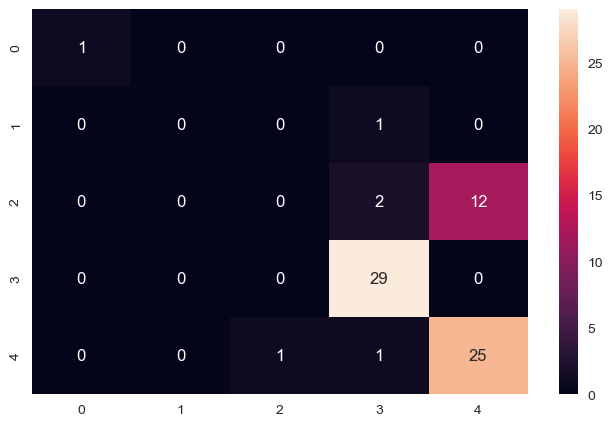

In [607]:
cm = confusion_matrix(Y_test, prediction_EnsemModelBaggingNEW)
fig = plt.figure(figsize=(8, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

# [OLD] Bagging Model

In [626]:
for clf in estimatorsOLD_fitted:
    clf_regOLD = BaggingClassifier(base_estimator=clf, random_state=42)
    ypred_clfOLD = clf.predict(X_test) # PREDICT CURRENT CLASSIFIER
    Clf_estimator = []
    Clf_estimator.append((clf,clf_regOLD))
    print("[{}] accuracy_score : ".format(clf), accuracy_score(Y_test, ypred_clfOLD),)
    
    # create the ensemble model
    clf_bagging_ensembleOLD = VotingClassifier(estimators)
    clf_bagging_ensembleOLD.fit(X_train, Y_train)
    ypred_clf_bagging_ensembleOLD = clf_bagging_ensembleOLD.predict(X_test)
    
print("\nEnsemble Model Classifier : [{:%}]".format(accuracy_score(Y_test, ypred_clf_bagging_ensembleOLD)))
print(classification_report(Y_test, ypred_clf_bagging_ensembleOLD))

[RandomForestClassifier()] accuracy_score :  0.7777777777777778
[DecisionTreeClassifier()] accuracy_score :  0.9444444444444444
[GaussianNB()] accuracy_score :  0.5694444444444444
[KNeighborsClassifier()] accuracy_score :  0.5277777777777778
[AdaBoostClassifier()] accuracy_score :  0.7916666666666666

Ensemble Model Classifier : [79.166667%]
                     precision    recall  f1-score   support

Barely-Satisfactory       1.00      1.00      1.00         1
Fairly-Satisfactory       0.00      0.00      0.00         1
       Satisfactory       0.00      0.00      0.00        14
           Superior       0.91      1.00      0.95        29
  Very-Satisfactory       0.69      1.00      0.82        27

           accuracy                           0.79        72
          macro avg       0.52      0.60      0.55        72
       weighted avg       0.64      0.79      0.70        72



In [608]:
#predict using [old] bagging model
prediction_EnsemModelBaggingOLD= clf_bagging_ensembleOLD.predict(X_test)
prediction_EnsemModelBaggingOLD

array(['Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Superior', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior', 'Superior',
       'Superior', 'Superior', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Very-Satisfactory',
       'Superior', 'Superior', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Superior', 'Very-Satisfactory', 'Superior', 'Superior',
       'Superior', 'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Superior', 'Superior', 'Barely-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Satisfactory', 'Very-Satisfactory', 'Very-Satisfactory',
 

<AxesSubplot:>

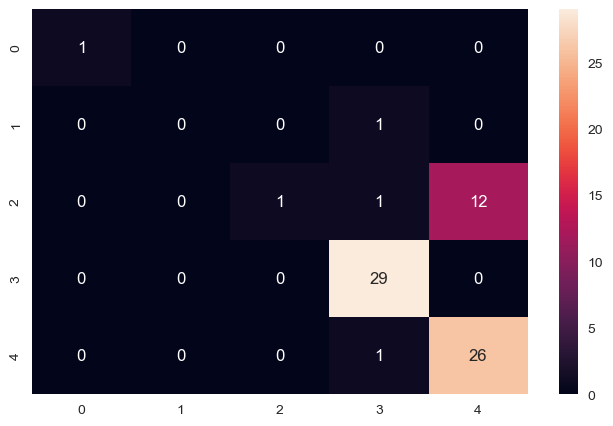

In [610]:
cm = confusion_matrix(Y_test, prediction_EnsemModelBaggingOLD)
fig = plt.figure(figsize=(8, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

In [631]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [632]:
X_train

,age,sex,course,yr_level,socioeconomic_stat,personality_type,fam_support,working_stud,scholar,TM1,...,tablet,wifi,prepaid-wifi,cellular_data,hotspot,vhigh_speed,high_speed,moderate_speed,light_speed,GPA
282,21.0,0,2,4,1,0,1,0,0,2,...,3,2,3,1,3,2,2,1,2,2.4375
333,20.0,0,4,3,1,5,1,0,0,2,...,3,3,3,1,2,3,3,1,3,1.5870
288,21.0,0,2,4,1,7,1,0,0,3,...,3,1,3,2,2,2,2,1,2,2.0313
75,21.0,0,1,4,1,7,1,0,0,2,...,3,1,2,2,2,2,1,2,2,1.8333
255,23.0,1,2,3,1,7,1,0,0,2,...,2,2,2,2,2,2,2,2,2,2.9881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21.0,0,1,4,1,6,1,0,0,2,...,3,1,2,1,3,2,1,2,2,1.8333
106,23.0,1,3,2,1,3,1,0,0,2,...,2,1,2,1,2,3,1,3,3,1.3846
270,22.0,0,2,3,1,0,1,0,0,2,...,3,1,3,2,2,2,2,2,2,2.0000
348,19.0,0,4,2,1,15,1,0,0,2,...,3,1,3,2,2,2,2,2,2,1.5147


In [643]:
newDF.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA', 'gpa_range'],
      dtype='object')

In [630]:
#from yellowbrick.classifier import PrecisionRecallCurve
#from yellowbrick.classifier import ClassPredictionError
#from yellowbrick.target import FeatureCorrelation

## Deploy trained model

In [96]:
import pickle

In [97]:
pickle.dump(bagging_ensemble, open('sa_model.pkl','wb'))

In [98]:
test_model = pickle.load(open('sa_model.pkl','rb'))

In [99]:
new_Xdata = X_test.sample(10)
new_Ydata = Y_test['gpa_range'].loc[new_Xdata.index.values]
print(new_Xdata)

      age  sex  course  yr_level  socioeconomic_stat  personality_type  \
248  19.0    1       2         3                   2                14   
73   22.0    0       1         4                   2                14   
322  21.0    0       4         3                   1                 4   
229  19.0    1       2         2                   3                10   
277  20.0    0       2         3                   1                13   
254  20.0    0       2         3                   1                 3   
45   21.0    0       1         3                   1                 3   
245  21.0    1       2         3                   1                 6   
157  21.0    1       3         4                   1                15   
265  20.0    1       2         3                   3                 3   

     fam_support  working_stud  scholar  TM1  ...  tablet  wifi  prepaid-wifi  \
248            1             0        0    2  ...       3     1             2   
73             1       

In [135]:
new_Xdata.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar', 'TM1',
       'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2', 'CAP3',
       'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6', 'GSS7', 'EP1',
       'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'prepaid-wifi',
       'cellular_data', 'hotspot', 'vhigh_speed', 'high_speed',
       'moderate_speed', 'light_speed', 'GPA'],
      dtype='object')

In [100]:
new_Ydata

248    3
73     2
322    2
229    2
277    4
254    3
45     3
245    3
157    4
265    3
Name: gpa_range, dtype: int64

In [101]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

[3.05472982 2.25490896 2.14966244 2.14681015 3.88341539 2.99752327
 2.47053771 2.99302233 3.81957045 2.87308485]


In [102]:
print(new_Ydata.values)

[3 2 2 2 4 3 3 3 4 3]


In [103]:
#checking for the accuracy score using r-squared
mse2 = mean_squared_error(new_Ydata, pred)
print('Mean Squared Error:\n', mse2)
acc = r2_score(new_Ydata, pred)
print('Accuracy Score:\n', acc)

Mean Squared Error:
 0.04545653832329723
Accuracy Score:
 0.9072315544422506
